In [1]:
# Load most common libraries

import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
#import gc
import seaborn as sns


In [2]:
# load data from website
data = pd.read_csv('https://jakubmichalak.com.pl/flat.csv', delimiter=";", decimal=",")

# explore data
print(data.head())

# explore data types
data.dtypes

    data_tran  kond  rok_bud  obreb        adres  miej_post  pom_dod    cena  \
0  2021-01-25     2     2019     27  ŻYRARDOWSKA          0        0  403000   
1  2021-01-07     1     2000     27     BAŁTYCKA          0        1  295000   
2  2021-01-04     2     1950     23   PILECKIEGO          0        1  240000   
3  2021-01-08     4     2015     22     BAŁTYCKA          1        0  290000   
4  2021-01-08     2     2014     16  NARUTOWICZA          1        0  350000   

     pow  
0  56.15  
1  46.95  
2  43.40  
3  44.70  
4  50.46  


data_tran     object
kond           int64
rok_bud        int64
obreb          int64
adres         object
miej_post      int64
pom_dod        int64
cena           int64
pow          float64
dtype: object

In [3]:
# convert string to date
data['data_tran'] = pd.to_datetime(data['data_tran'], format='%Y-%m-%d')

# convert integer to string
data['kond'] = [str(x) for x in data['kond']]

In [4]:
# add new target column
prices_unit = data['cena'] / data['pow']
data['unitprice'] = [int(x) for x in prices_unit]

In [5]:
data2 = pd.DataFrame (data['data_tran'].dt.month)
data2['unitprice'] = data['unitprice']

print(data2)

     data_tran  unitprice
0            1       7177
1            1       6283
2            1       5529
3            1       6487
4            1       6936
..         ...        ...
139         12       7810
140         12       8878
141         12       6975
142         12       6000
143         12       6060

[144 rows x 2 columns]


In [6]:
indes = pd.DataFrame(data2.groupby('data_tran').mean())

In [15]:
print(indes['unitprice'][1])

data2['unitpricebeta'] = data2['unitprice']

6340.909090909091


In [8]:
index = [0] * 12
# indes = pd.DataFrame(index)

for i in range(12):
    index[i] = indes['unitprice'][i+1] / indes['unitprice'][12] 

In [13]:
print(index)

[0.8005692937199786, 0.8266649832712581, 0.8313616564610821, 0.8399385560675884, 0.8918102813374577, 0.8687679973583641, 0.8615469166013732, 1.025456094943501, 0.9286709755114528, 0.8492014393030743, 0.881023023438275, 1.0]


In [40]:
data2['unitpricebeta'] = data2['unitprice']

for i in range(len(data2)):
        data2['unitpricebeta'][i] = data2['unitprice'][i] / index[data2['data_tran'][i]-1]
     

/tmp/ipykernel_4064/629380333.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data2['unitpricebeta'][i] = data2['unitprice'][i] / index[data2['data_tran'][i]-1]
/tmp/ipykernel_4064/629380333.py:4: SettingWithCopyWarning: 
A value is tryi

In [44]:
display(data2)

,data_tran,unitprice,unitpricebeta
0,1,7177,8964
1,1,6283,7848
2,1,5529,6906
3,1,6487,8102
4,1,6936,8663
...,...,...,...
139,12,7810,7810
140,12,8878,8878
141,12,6975,6975
142,12,6000,6000


In [43]:
data2['unitpricebeta'] = [int(x) for x in data2['unitpricebeta']]
# index[0]

In [46]:
data2['data'] = data['data_tran']

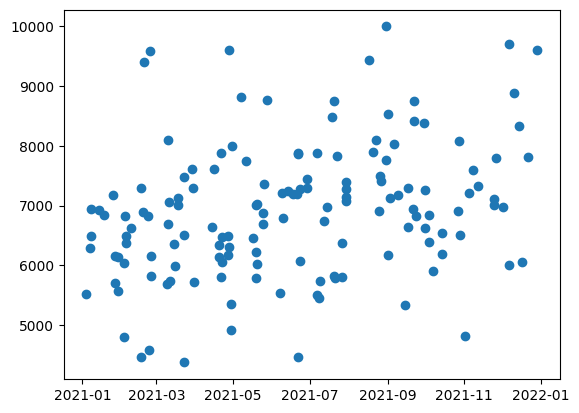

In [49]:
plt.scatter(data2['data'], data2['unitprice'])
plt.show()

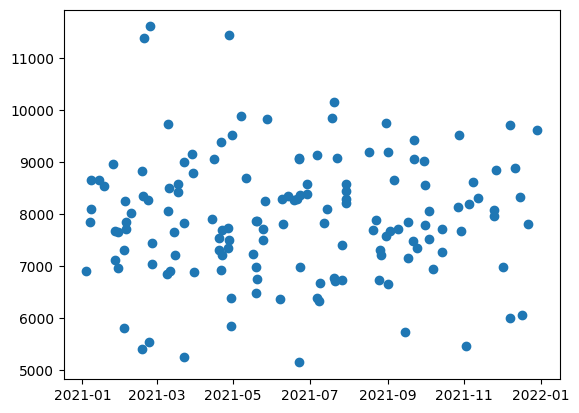

In [51]:
plt.scatter(data2['data'], data2['unitpricebeta'])
plt.show()

In [57]:
data2.groupby('data_tran').mean()['unitpricebeta']

data_tran
1     7920.000000
2     7920.000000
3     7920.066667
4     7919.933333
5     7919.916667
6     7919.923077
7     7920.058824
8     7920.125000
9     7920.000000
10    7920.000000
11    7919.857143
12    7920.500000
Name: unitpricebeta, dtype: float64

0.014659709931858847 7919.933587698533


/tmp/ipykernel_4064/2635839658.py:27: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = np.linalg.lstsq(A, y)[0]


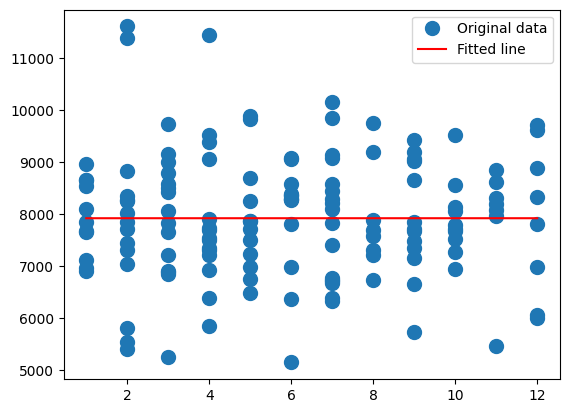

In [71]:
# convert date to month

# data2['mc'] = data2['data_tran'].apply(lambda date:date.month)

# convert to numpy array to use with polyfit

x = np.array(data2['data_tran'])
y = np.array(data2['unitpricebeta'])

A = np.vstack([x, np.ones(len(x))]).T

# WYKRES CEN POSZCZEGÓLNYCH MIESIĄCACH

#plt.scatter(data['mc'],data['unitprice'], c=data['unitprice'])

# data2.groupby('data_tran').mean()['unitpricebeta'].plot()
# plt.suptitle('Trend czasowy')
# plt.ylabel('Cena jednostkowa')
# plt.xlabel('Miesiąc')

#add trend line

# z = np.polyfit(x,y,1) #coeff
# p = np.poly1d(z)
# plt.plot(x,p(x))

m, c = np.linalg.lstsq(A, y)[0]

print(m, c)

import matplotlib.pyplot as plt

_ = plt.plot(x, y, 'o', label='Original data', markersize=10)

_ = plt.plot(x, m*x + c, 'r', label='Fitted line')

_ = plt.legend()

plt.show()


# check r squared
# corrtt = np.corrcoef(x, y)[0,1]
# r_qrt_tt = corrtt**2
# print (r_qrt_tt)